# NBA Data Analysis
Dataset: https://www.kaggle.com/datasets/justinas/nba-players-data

## Passo a passo
* Coletar dados ✔
  - Extrair mais dados da web ✔
* Pré-processamento dos dados
  - Definição de tipos
  - Tratamento de dados ausentes
  - Normalização e discretização
  - Limpeza de dados/remoção de outliers
* Apresentar estatísticas descritivas utilizando visualizações
* Realizar testes de hipóteses para comparação dos valores de categorias e visualizar diferenças

## Dependencias

In [1]:
! pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 14.6 MB/s 


In [2]:
import pandas as pd
import numpy as np
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
from unidecode import unidecode

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Path Amanda

In [4]:
data_path = '/content/drive/MyDrive/facul/2022.1/TAGDI/projeto1/data/all_seasons.csv'

In [5]:
# Path Tales
data_path = '/content/drive/MyDrive/2022.1/TA GDI/projeto1/data/all_seasons.csv'

## Carregar dados

In [6]:
df = pd.read_csv(data_path)

In [7]:
df.tail()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
11695,11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21
11696,11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,...,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,...,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21
11699,11699,Aaron Gordon,DEN,25.0,203.20,106.594120,Arizona,USA,2014,1,...,12.4,5.7,3.2,2.1,0.055,0.150,0.204,0.547,0.165,2020-21


In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

## Acrescentar dados
- Não encontramos na base de dados do Kaggle os dados da última temporada da NBA, portanto, fomos em busca desses dados mais recentes no site [Basketball Reference](https://www.basketball-reference.com)
- Boa parte das colunas faltantes podem ser encontradas em diferentes tabelas e nas páginas individuais dos jogadores (como país de origem, faculdade etc)

### Per Game Table
Para obter:
- Nome, time, idade, jogos, pontos, rebotes, assistências e temporada

In [136]:
df_new = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2022_per_game.html', header=0)[0]

In [137]:
df_new.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
837,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2
841,605,Ivica Zubac,C,24,LAC,76,76,24.4,4.1,6.5,...,.727,2.9,5.6,8.5,1.6,0.5,1.0,1.5,2.7,10.3


In [138]:
df_new.shape

(842, 30)

In [139]:
df_new = df_new[df_new.Rk != 'Rk']

In [140]:
df_new.shape

(812, 30)

In [141]:
df_new.reset_index(drop=True, inplace=True)

In [142]:
df_new.drop(columns=['Rk'], inplace=True)

In [143]:
print(df.columns, '\n\n', df_new.columns)

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object') 

 Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [144]:
df_new.rename(columns={'Player': 'player_name', 'Age': 'age', 'Tm': 'team_abbreviation', 'G': 'gp', 'TRB': 'reb', 'AST': 'ast', 'PTS': 'pts'}, inplace=True)
df_new.head()

,player_name,Pos,age,team_abbreviation,gp,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,reb,ast,STL,BLK,TOV,PF,pts
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [145]:
df_new.drop(columns=['Pos', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 
                     'DRB', 'STL', 'BLK', 'TOV', 'PF'], inplace=True)
df_new.tail()

,player_name,age,team_abbreviation,gp,reb,ast,pts
807,Thaddeus Young,33,TOR,26,4.4,1.7,6.3
808,Trae Young,23,ATL,76,3.7,9.7,28.4
809,Omer Yurtseven,23,MIA,56,5.3,0.9,5.3
810,Cody Zeller,29,POR,27,4.6,0.8,5.2
811,Ivica Zubac,24,LAC,76,8.5,1.6,10.3


Reordenando colunas

In [146]:
cols = df_new.columns.tolist()
cols = [cols[0], cols[2], cols[1], cols[3], cols[6], cols[4], cols[5]]
df_new = df_new[cols]
df_new.head()

,player_name,team_abbreviation,age,gp,pts,reb,ast
0,Precious Achiuwa,TOR,22,73,9.1,6.5,1.1
1,Steven Adams,MEM,28,76,6.9,10.0,3.4
2,Bam Adebayo,MIA,24,56,19.1,10.1,3.4
3,Santi Aldama,MEM,21,32,4.1,2.7,0.7
4,LaMarcus Aldridge,BRK,36,47,12.9,5.5,0.9


Inserindo novas colunas antes de buscar os dados

In [147]:
df_new.insert(3, 'player_height', np.nan)

In [148]:
df_new.insert(4, 'player_weight', np.nan)

In [149]:
df_new.insert(5, 'college', '')

In [150]:
df_new.insert(6, 'country', '')

In [151]:
df_new.insert(7, 'draft_year', np.nan)
df_new.insert(8, 'draft_round', np.nan)
df_new.insert(9, 'draft_number', np.nan)

In [152]:
df_new.insert(14, 'net_rating', np.nan)
df_new.insert(15, 'oreb_pct', np.nan)
df_new.insert(16, 'dreb_pct', np.nan)
df_new.insert(17, 'usg_pct', np.nan)
df_new.insert(18, 'ts_pct', np.nan)
df_new.insert(19, 'ast_pct', np.nan)

In [153]:
df_new['season']='2021-22'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
df_new.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Precious Achiuwa,TOR,22,NaN,NaN,,,NaN,NaN,NaN,...,9.1,6.5,1.1,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
1,Steven Adams,MEM,28,NaN,NaN,,,NaN,NaN,NaN,...,6.9,10.0,3.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
2,Bam Adebayo,MIA,24,NaN,NaN,,,NaN,NaN,NaN,...,19.1,10.1,3.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
3,Santi Aldama,MEM,21,NaN,NaN,,,NaN,NaN,NaN,...,4.1,2.7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
4,LaMarcus Aldridge,BRK,36,NaN,NaN,,,NaN,NaN,NaN,...,12.9,5.5,0.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-22


In [155]:
df_new.dtypes

player_name           object
team_abbreviation     object
age                   object
player_height        float64
player_weight        float64
college               object
country               object
draft_year           float64
draft_round          float64
draft_number         float64
gp                    object
pts                   object
reb                   object
ast                   object
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

### Advanced
Para obter
  * True Shooting %, Offensive Rebound %, Defensive Rebound %, Assist %, Usage Rate (%) 

In [156]:
df_advanced = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2022_advanced.html', header=0)[0]
df_advanced.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,C,22,TOR,73,1725,12.7,.503,.259,...,NaN,0.4,2.1,2.5,.070,NaN,-2.0,-0.6,-2.6,-0.2
1,2,Steven Adams,C,28,MEM,76,1999,17.6,.560,.003,...,NaN,3.8,3.0,6.8,.163,NaN,1.0,1.0,2.0,2.0
2,3,Bam Adebayo,C,24,MIA,56,1825,21.8,.608,.008,...,NaN,3.6,3.5,7.2,.188,NaN,1.7,2.1,3.8,2.7
3,4,Santi Aldama,PF,21,MEM,32,360,10.2,.452,.364,...,NaN,-0.1,0.4,0.3,.044,NaN,-4.2,-1.5,-5.7,-0.3
4,5,LaMarcus Aldridge,C,36,BRK,47,1050,19.6,.604,.100,...,NaN,2.1,1.0,3.1,.141,NaN,1.3,-0.6,0.7,0.7


In [157]:
df_advanced.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [158]:
df_advanced.shape

(842, 29)

In [159]:
df_advanced = df_advanced[df_advanced['Rk'] != 'Rk']

In [160]:
df_advanced.shape

(812, 29)

In [179]:
df_advanced.reset_index(drop=True, inplace=True)

In [180]:
df_advanced.tail()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
807,601,Thaddeus Young,PF,33,TOR,26,475,15.8,.526,.299,...,NaN,0.5,0.8,1.3,.127,NaN,-0.2,2.2,2.0,0.5
808,602,Trae Young,PG,23,ATL,76,2652,25.4,.603,.395,...,NaN,9.0,1.0,10.0,.181,NaN,7.1,-2.0,5.2,4.8
809,603,Omer Yurtseven,C,23,MIA,56,706,17.4,.546,.045,...,NaN,0.8,1.4,2.1,.145,NaN,-1.4,0.4,-1.0,0.2
810,604,Cody Zeller,C,29,POR,27,355,17.2,.627,.044,...,NaN,0.9,0.2,1.1,.143,NaN,-1.2,-1.0,-2.1,0.0
811,605,Ivica Zubac,C,24,LAC,76,1852,19.2,.660,.000,...,NaN,4.3,2.9,7.2,.187,NaN,-0.1,0.8,0.7,1.3


In [181]:
df_new['ts_pct']=pd.to_numeric(df_advanced['TS%'])

In [182]:
df_new['oreb_pct']=pd.to_numeric(df_advanced['ORB%'])/100
df_new['dreb_pct']=pd.to_numeric(df_advanced['DRB%'])/100
df_new['usg_pct']=pd.to_numeric(df_advanced['USG%'])/100
df_new['ast_pct']=pd.to_numeric(df_advanced['AST%'])/100

In [183]:
df_new.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Precious Achiuwa,TOR,22,203.0,102.0,Memphis,Nigeria,2020.0,1.0,20.0,...,9.1,6.5,1.1,0.0,0.087,0.217,0.185,0.503,0.069,2021-22
1,Steven Adams,MEM,28,211.0,120.0,Pitt,New Zealand,2013.0,1.0,12.0,...,6.9,10.0,3.4,4.2,0.179,0.220,0.120,0.560,0.161,2021-22
2,Bam Adebayo,MIA,24,206.0,115.0,Kentucky,USA,2017.0,1.0,14.0,...,19.1,10.1,3.4,5.5,0.087,0.261,0.250,0.608,0.175,2021-22
3,Santi Aldama,MEM,21,211.0,101.0,Loyola (MD),Spain,2021.0,1.0,30.0,...,4.1,2.7,0.7,-3.8,0.094,0.161,0.184,0.452,0.077,2021-22
4,LaMarcus Aldridge,BRK,36,211.0,113.0,Texas,USA,2006.0,1.0,2.0,...,12.9,5.5,0.9,0.1,0.078,0.187,0.224,0.604,0.063,2021-22


In [185]:
df_new.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
807,Thaddeus Young,TOR,33,203.0,106.0,Georgia Tech,USA,2007.0,1.0,12.0,...,6.3,4.4,1.7,5.7,0.087,0.181,0.160,0.526,0.136,2021-22
808,Trae Young,ATL,23,185.0,74.0,Oklahoma,USA,2018.0,1.0,5.0,...,28.4,3.7,9.7,-1.2,0.021,0.096,0.344,0.603,0.467,2021-22
809,Omer Yurtseven,MIA,23,213.0,119.0,NC State,Turkey,NaN,NaN,NaN,...,5.3,5.3,0.9,NaN,0.139,0.330,0.199,0.546,0.110,2021-22
810,Cody Zeller,POR,29,211.0,108.0,Indiana,USA,2013.0,1.0,4.0,...,5.2,4.6,0.8,1.5,0.149,0.241,0.159,0.627,0.094,2021-22
811,Ivica Zubac,LAC,24,213.0,108.0,,Bosnia and Herzegovina,2016.0,2.0,32.0,...,10.3,8.5,1.6,0.5,0.128,0.237,0.168,0.660,0.098,2021-22


### Play-by-play
Para obter:
  * net rating

In [164]:
df_pbp = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2022_play-by-play.html', header=1)[0]
df_pbp.head()

,Rk,Player,Pos,Age,Tm,G,MP,PG%,SG%,SF%,...,On-Off,BadPass,LostBall,Shoot,Off.,Shoot.1,Off..1,PGA,And1,Blkd
0,1,Precious Achiuwa,C,22,TOR,73,1725,NaN,NaN,NaN,...,0.0,19,26,70,24,64,10,200,15,51
1,2,Steven Adams,C,28,MEM,76,1999,NaN,NaN,NaN,...,4.2,71,15,78,19,83,13,569,23,44
2,3,Bam Adebayo,C,24,MIA,56,1825,NaN,NaN,NaN,...,5.5,59,39,72,38,173,8,480,48,40
3,4,Santi Aldama,PF,21,MEM,32,360,NaN,NaN,3%,...,-3.8,7,3,16,5,16,1,58,5,5
4,5,LaMarcus Aldridge,C,36,BRK,47,1050,NaN,NaN,NaN,...,0.1,12,11,46,12,56,0,110,22,11


In [165]:
df_pbp.dtypes

Rk          object
Player      object
Pos         object
Age         object
Tm          object
G           object
MP          object
PG%         object
SG%         object
SF%         object
PF%         object
C%          object
OnCourt     object
On-Off      object
BadPass     object
LostBall    object
Shoot       object
Off.        object
Shoot.1     object
Off..1      object
PGA         object
And1        object
Blkd        object
dtype: object

In [166]:
df_pbp.shape

(842, 23)

In [167]:
df_pbp=df_pbp[df_pbp['Rk'] != 'Rk']

In [186]:
df_pbp.reset_index(drop=True, inplace=True)

In [168]:
df_pbp.shape

(812, 23)

In [188]:
df_new['net_rating']=pd.to_numeric(df_pbp['On-Off'])

In [189]:
df_new.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
807,Thaddeus Young,TOR,33,203.0,106.0,Georgia Tech,USA,2007.0,1.0,12.0,...,6.3,4.4,1.7,4.4,0.087,0.181,0.160,0.526,0.136,2021-22
808,Trae Young,ATL,23,185.0,74.0,Oklahoma,USA,2018.0,1.0,5.0,...,28.4,3.7,9.7,3.4,0.021,0.096,0.344,0.603,0.467,2021-22
809,Omer Yurtseven,MIA,23,213.0,119.0,NC State,Turkey,NaN,NaN,NaN,...,5.3,5.3,0.9,0.3,0.139,0.330,0.199,0.546,0.110,2021-22
810,Cody Zeller,POR,29,211.0,108.0,Indiana,USA,2013.0,1.0,4.0,...,5.2,4.6,0.8,6.8,0.149,0.241,0.159,0.627,0.094,2021-22
811,Ivica Zubac,LAC,24,213.0,108.0,,Bosnia and Herzegovina,2016.0,2.0,32.0,...,10.3,8.5,1.6,-6.8,0.128,0.237,0.168,0.660,0.098,2021-22


### Dados gerais do jogador
* Peso e altura
* Faculdade
* País
* Informações do draft

Pegando os links para as páginas dos jogadores

In [171]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html'
soup = BeautifulSoup(urlopen(url), 'html.parser')
info = soup.find(id="per_game_stats")
body = info.tbody
player_links = []
for row in body.find_all('tr'):
    if row.td:
      player_links.append(row.td.a.get('href'))

In [172]:
len(player_links)

812

In [173]:
def get_additional_player_info(row):
  def get_name_url(index: int):
    return f'https://www.basketball-reference.com{player_links[index]}'

  def has_numbers(input):
    return any(char.isdigit() for char in input)

  def get_height_and_weight(text):
    height, weight = np.nan, np.nan
    h = re.search(r'[0-9]+cm', text)
    if h:
      height = float(h.group(0).split('c')[0])
    w = re.search(r'[0-9]+kg', text)
    if w:
      weight = float(w.group(0).split('k')[0])
    return (height, weight)

  def get_country(a):
    country = ''
    c = re.search(r'country=[A-Z]+', a.__str__())
    if c:
      if c.group(0).split('=')[1] == 'US':
        country = 'USA'
      else:
        country = a.string
    return country

  def get_college(a):
    return a.string

  def get_draft_year(a):
    return int(a.string.split()[0])

  def get_draft_info(text):
    round, pick = np.nan, np.nan
    r = re.search(r"[0-9]+[(nd)|(st)|(rd)|(th)]+ round", text.__str__())
    if r:
      round = int(re.search(r'[0-9]+', r.group(0)).group(0))
    p = re.search(r"[0-9]+[(nd)|(st)|(rd)|(th)]+ overall", text.__str__())
    if p:
      pick = int(re.search(r'[0-9]+', p.group(0)).group(0))
    return round, pick

  url = get_name_url(row.name)
  soup = BeautifulSoup(urlopen(url), 'html.parser')
  info = soup.find(id="meta").contents[3] if soup.find("div", {"class": "media-item"}) else soup.find(id="meta").contents[1]
  
  for p in info.find_all('p'):
    if p.strong and p.strong.string:
      if 'Born' in p.strong.string:
        row['country']= get_country(p.find_all('span')[1].a)
      elif 'College' in p.strong.string:
        row['college'] = get_college(p.a)
      elif 'Draft' in p.strong.string:
        row['draft_year'] = get_draft_year(p.find_all('a')[1])
        row['draft_round'], row['draft_number'] = get_draft_info(p.contents[4])
    elif p.span and has_numbers(p.span.string) and not '(' in p.span.string:
      row['player_height'], row['player_weight'] = get_height_and_weight(p.contents[3])
    else:
      pass
  return row

In [174]:
df_new.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Precious Achiuwa,TOR,22,NaN,NaN,,,NaN,NaN,NaN,...,9.1,6.5,1.1,0.0,0.087,0.217,0.185,0.503,0.069,2021-22
1,Steven Adams,MEM,28,NaN,NaN,,,NaN,NaN,NaN,...,6.9,10.0,3.4,4.2,0.179,0.220,0.120,0.560,0.161,2021-22
2,Bam Adebayo,MIA,24,NaN,NaN,,,NaN,NaN,NaN,...,19.1,10.1,3.4,5.5,0.087,0.261,0.250,0.608,0.175,2021-22
3,Santi Aldama,MEM,21,NaN,NaN,,,NaN,NaN,NaN,...,4.1,2.7,0.7,-3.8,0.094,0.161,0.184,0.452,0.077,2021-22
4,LaMarcus Aldridge,BRK,36,NaN,NaN,,,NaN,NaN,NaN,...,12.9,5.5,0.9,0.1,0.078,0.187,0.224,0.604,0.063,2021-22


In [ ]:
df_new = df_new.apply(get_additional_player_info, axis=1)
df_new.tail()

In [190]:
df_new.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
807,Thaddeus Young,TOR,33,203.0,106.0,Georgia Tech,USA,2007.0,1.0,12.0,...,6.3,4.4,1.7,4.4,0.087,0.181,0.160,0.526,0.136,2021-22
808,Trae Young,ATL,23,185.0,74.0,Oklahoma,USA,2018.0,1.0,5.0,...,28.4,3.7,9.7,3.4,0.021,0.096,0.344,0.603,0.467,2021-22
809,Omer Yurtseven,MIA,23,213.0,119.0,NC State,Turkey,NaN,NaN,NaN,...,5.3,5.3,0.9,0.3,0.139,0.330,0.199,0.546,0.110,2021-22
810,Cody Zeller,POR,29,211.0,108.0,Indiana,USA,2013.0,1.0,4.0,...,5.2,4.6,0.8,6.8,0.149,0.241,0.159,0.627,0.094,2021-22
811,Ivica Zubac,LAC,24,213.0,108.0,,Bosnia and Herzegovina,2016.0,2.0,32.0,...,10.3,8.5,1.6,-6.8,0.128,0.237,0.168,0.660,0.098,2021-22


Inserindo os dados no dataframe inicial e salvando em um novo arquivo csv

In [191]:
df.shape

(11700, 21)

In [192]:
df.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21
11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,15,...,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,14,...,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21
11699,Aaron Gordon,DEN,25.0,203.20,106.594120,Arizona,USA,2014,1,4,...,12.4,5.7,3.2,2.1,0.055,0.150,0.204,0.547,0.165,2020-21


In [193]:
df = df.append(df_new, ignore_index=True)

In [194]:
df.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12507,Thaddeus Young,TOR,33,203.0,106.0,Georgia Tech,USA,2007.0,1.0,12.0,...,6.3,4.4,1.7,4.4,0.087,0.181,0.160,0.526,0.136,2021-22
12508,Trae Young,ATL,23,185.0,74.0,Oklahoma,USA,2018.0,1.0,5.0,...,28.4,3.7,9.7,3.4,0.021,0.096,0.344,0.603,0.467,2021-22
12509,Omer Yurtseven,MIA,23,213.0,119.0,NC State,Turkey,NaN,NaN,NaN,...,5.3,5.3,0.9,0.3,0.139,0.330,0.199,0.546,0.110,2021-22
12510,Cody Zeller,POR,29,211.0,108.0,Indiana,USA,2013.0,1.0,4.0,...,5.2,4.6,0.8,6.8,0.149,0.241,0.159,0.627,0.094,2021-22
12511,Ivica Zubac,LAC,24,213.0,108.0,,Bosnia and Herzegovina,2016.0,2.0,32.0,...,10.3,8.5,1.6,-6.8,0.128,0.237,0.168,0.660,0.098,2021-22


In [195]:
df.shape

(12512, 21)

In [197]:
df.to_csv('/content/drive/MyDrive/2022.1/TA GDI/projeto1/data/all_seasons+2021-22.csv', index=False)

E de agora em diante, trabalharemos com o dataset aumentado: all_seasons+2021-22.csv

## Pre-processamento

In [ ]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


### Análise da coluna `country`

In [ ]:
pl_per_country = pd.DataFrame(df['country'].value_counts().reset_index())
pl_per_country.columns = ['country', 'count']

In [ ]:
pl_per_country

,country,count
0,USA,9836
1,France,167
2,Canada,161
3,Brazil,83
4,Australia,83
...,...,...
74,USSR,2
75,Ghana,1
76,Trinidad and Tobago,1
77,Sudan (UK),1


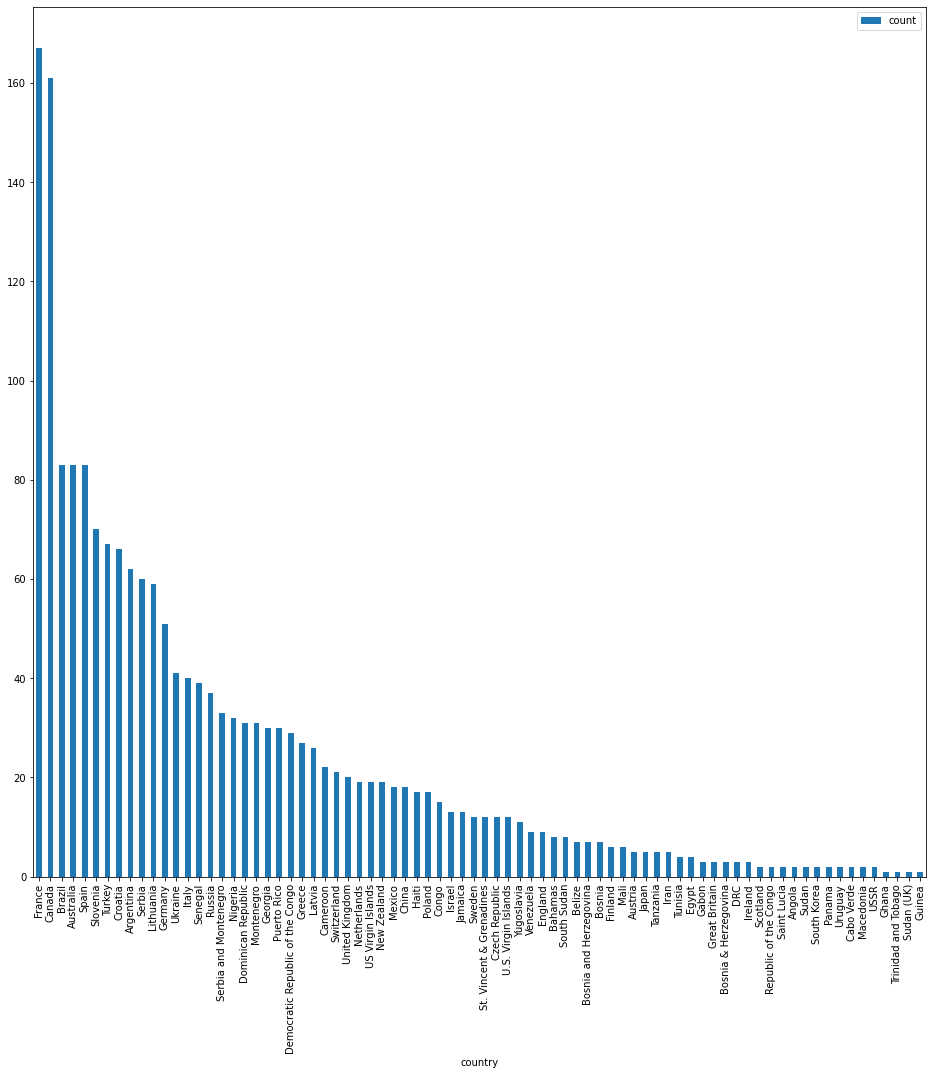

In [ ]:
pl_per_country[pl_per_country['country'] != 'USA'].plot.bar(x='country', figsize=(16,16))

- tem 2 US Virgin Islands
- tem 2 Democratic Rebulic of Congo (DRC) - investigar se eh != de Congo tbm
- tem congo e republic of congo
- tem 2 Bosnia & Herzegovina (e tbm tem Bosnia)
- tem Sudan e Sudan (UK)
- great britain e united kingdom



### Análise da pontuação dos jogadores

In [ ]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
